In [2]:
import pandas as pd
import numpy as np

# 1. Data type, range constraint and duplicate

In [3]:
ride_sharing = pd.read_csv('ride_sharing.csv', index_col=0)
# ride_sharing.head(3)

In [4]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25761 entries, 0 to 25760
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25761 non-null  object
 1   station_A_id     25761 non-null  int64 
 2   station_A_name   25761 non-null  object
 3   station_B_id     25761 non-null  int64 
 4   station_B_name   25761 non-null  object
 5   bike_id          25761 non-null  int64 
 6   user_type        25761 non-null  int64 
 7   user_birth_year  25761 non-null  int64 
 8   user_gender      25761 non-null  object
 9   ride_date        25761 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


## Numeric to category

In [5]:
ride_sharing['user_type'].describe()

count    25761.000000
mean         2.008424
std          0.704554
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [6]:
ride_sharing['user_type'].dtype

dtype('int64')

In [7]:
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [8]:
#assert ride_sharing.user_type_cat.dtype == 'category'

In [9]:
ride_sharing['user_type_cat'].describe()

count     25761
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64

## String striping

In [10]:
ride_sharing['duration'].head(5)

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: object

In [11]:
# strip() 去掉首尾的空格或指定字符串
ride_sharing['duration'].str.strip('minutes')

0        12 
1        24 
2         8 
3         4 
4        11 
        ... 
25756    10 
25757    14 
25758    14 
25759    29 
25760    29 
Name: duration, Length: 25761, dtype: object

In [12]:
ride_sharing['duration_time'] = ride_sharing['duration'].str.strip('minutes').astype('int')
ride_sharing.duration_time.head(3)

0    12
1    24
2     8
Name: duration_time, dtype: int64

In [13]:
ride_sharing.duration_time.mean()

11.389736423275494

## Adding constraints

In [14]:
import datetime as dt

In [15]:
ride_sharing.ride_date.head(5)

0    2020-01-19
1    2018-10-24
2    2017-12-25
3    2023-01-20
4    2019-01-29
Name: ride_date, dtype: object

In [16]:
# string -> pandas datetime -> datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date
ride_sharing.ride_dt.head(3)

0    2020-01-19
1    2018-10-24
2    2017-12-25
Name: ride_dt, dtype: object

In [17]:
today = dt.date.today()
today

datetime.date(2022, 2, 12)

In [18]:
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today
ride_sharing.ride_dt.max()

datetime.date(2022, 2, 12)

## Duplicates

In [19]:
ride_sharing.shape

(25761, 13)

In [20]:
# remove duplicated rows
ride_nodup = ride_sharing.drop_duplicates()
ride_nodup.shape

(25760, 13)

In [21]:
ride_nodup.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,ride_date,user_type_cat,duration_time,ride_dt
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2020-01-19,2,12,2020-01-19
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2018-10-24,2,24,2018-10-24
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,2017-12-25,3,8,2017-12-25


## Aggregation and statistics

In [22]:
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

In [23]:
ride_nodup.groupby('station_A_id').agg(statistics).reset_index()

,station_A_id,user_birth_year,duration_time
0,3,1943,11.449810
1,5,1936,12.945935
2,15,1947,15.441679
3,16,1943,11.895052
4,21,1943,10.239827
5,22,1942,10.336197
6,30,1901,10.409819
7,67,1902,10.010179
8,81,1927,10.554455


# 2. Text and categorical data

In [24]:
airlines = pd.read_csv('airlines_final.csv', index_col=0)
airlines.head(3)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral


In [25]:
# standard categories of each aspect
standard_dict = {'cleanliness' : ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
'safety' : ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
'satisfaction' : ['Very satisfied', 'Neutral', 'Somewhat satisfied', 
                'Somewhat unsatisfied', 'Very unsatisfied']}

In [26]:
categories = pd.DataFrame(standard_dict)
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


## Compare with standard categories

In [27]:
airlines['satisfaction'].unique()

array(['Very satisfied', 'Neutral', 'Somewhat satsified',
       'Somewhat unsatisfied', 'Very unsatisfied'], dtype=object)

In [28]:
set(airlines['cleanliness']).difference(categories['safety'])

{'Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty'}

In [29]:
set(airlines['safety']).difference(categories['safety'])

set()

In [30]:
cat_err = set(airlines['satisfaction']).difference(categories['satisfaction'])
cat_err

{'Somewhat satsified'}

In [31]:
# find the rows that have the inconsistent category of 'satisfaction'
cat_err_rows = airlines['satisfaction'].isin(cat_err)
airlines[cat_err_rows].head(3)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
6,2578,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,63.0,Clean,Very safe,Somewhat satsified


In [32]:
#airlines[~cat_err_rows]

## Category inconsistent

In [33]:
airlines.dest_region.unique()

array(['Asia', 'Canada/Mexico', 'West US', 'East US', 'Midwest US',
       'EAST US', 'Middle East', 'Europe', 'eur', 'Central/South America',
       'Australia/New Zealand', 'middle east'], dtype=object)

In [34]:
airlines.dest_size.unique()

array(['Hub', 'Small', '    Hub', 'Medium', 'Large', 'Hub     ',
       '    Small', 'Medium     ', '    Medium', 'Small     ',
       '    Large', 'Large     '], dtype=object)

In [35]:
airlines['dest_region'].str.upper()

0                ASIA
1       CANADA/MEXICO
2             WEST US
3             WEST US
4             EAST US
            ...      
2804          EAST US
2805          WEST US
2806          EAST US
2807          WEST US
2808             ASIA
Name: dest_region, Length: 2477, dtype: object

In [36]:
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur': 'europe'})
airlines.dest_region.unique()

array(['asia', 'canada/mexico', 'west us', 'east us', 'midwest us',
       'middle east', 'europe', 'central/south america',
       'australia/new zealand'], dtype=object)

## Category binning

In [37]:
# create ranges
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

In [38]:
pd.cut(airlines.wait_min, bins=label_ranges, 
                               labels=label_names)

0       medium
1       medium
2       medium
3         long
4         long
         ...  
2804      long
2805    medium
2806    medium
2807    medium
2808      long
Name: wait_min, Length: 2477, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [39]:
# remap to bins
airlines['wait_type'] = pd.cut(airlines.wait_min, bins=label_ranges, 
                               labels=label_names)
airlines[['wait_type', 'wait_min']].head(3)

,wait_type,wait_min
0,medium,115.0
1,medium,135.0
2,medium,70.0


## Category remapping

In [40]:
mappings = {'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday', 
           'Thursday': 'weekday', 'Friday': 'weekday', 'Saturday': 'weekend', 
           'Sunday': 'weekend'}

In [41]:
airlines['day_week'] = airlines['day'].replace(mappings)
airlines[['day_week', 'day']].head(3)

,day_week,day
0,weekday,Tuesday
1,weekday,Friday
2,weekday,Thursday


## String formatting

In [42]:
full_name = pd.read_csv('full_name.csv')
full_name.head(5)

,full_name
0,Melodie Stuart
1,Dominic Shannon
2,Quintessa Tillman
3,Dr. Christine Nicholson
4,Regina Clements


In [43]:
full_name['full_name']

0               Melodie Stuart
1              Dominic Shannon
2            Quintessa Tillman
3      Dr. Christine Nicholson
4              Regina Clements
                ...           
195           Ms. Vanna Rivera
196            Miss Venus Lowe
197            Amethyst Nieves
198        Miss Vivian Foreman
199         Miss Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [44]:
full_name['full_name'].str.replace('Dr.', '').str.replace('Ms.', '').str.replace('Miss', '').str.replace('Mr.', '')

<ipython-input-44-ed574ac0db51>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  full_name['full_name'].str.replace('Dr.', '').str.replace('Ms.', '').str.replace('Miss', '').str.replace('Mr.', '')


0            Melodie Stuart
1           Dominic Shannon
2         Quintessa Tillman
3       Christine Nicholson
4           Regina Clements
               ...         
195            Vanna Rivera
196              Venus Lowe
197         Amethyst Nieves
198          Vivian Foreman
199           Wendy Griffin
Name: full_name, Length: 200, dtype: object

In [45]:
# full_name['full_name'].str.strip('Dr.')

In [46]:
# find the names that are longer than 10
name_length = full_name['full_name'].str.len()
full_name[name_length > 10]

,full_name
0,Melodie Stuart
1,Dominic Shannon
2,Quintessa Tillman
3,Dr. Christine Nicholson
4,Regina Clements
...,...
195,Ms. Vanna Rivera
196,Miss Venus Lowe
197,Amethyst Nieves
198,Miss Vivian Foreman


# 3. Units & Missing Value

## 

In [47]:
banking = pd.read_csv('banking_dirty.csv', index_col=0)
banking.head(5)

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
19,DEB87C87,7/28/93,27,64944.62,NaN,11828.0,13372.0,1039.0,5562.0,20-03-18,15-11-19
35,078C654F,10/17/93,27,87312.64,NaN,3684.0,17635.0,11717.0,33493.0,14-04-17,5/8/18
99,AC91D689,5/18/93,27,99490.61,NaN,2184.0,17918.0,6714.0,5333.0,1/8/17,4/8/19
22,96525DA6,11/23/92,28,82511.24,NaN,8206.0,15019.0,5559.6,6182.0,23-07-18,7/8/18
24,EC10469C,3/25/92,28,73618.75,NaN,2808.0,22831.0,958.0,22380.0,27-12-18,8/6/18


In [48]:
banking['account_opened']

19    20-03-18
35    14-04-17
99      1/8/17
22    23-07-18
24    27-12-18
        ...   
37     10/8/18
47      3/4/18
49      8/3/18
94    13-11-17
32      8/8/18
Name: account_opened, Length: 100, dtype: object

In [49]:
banking['account_opened'] = pd.to_datetime(banking.account_opened, 
                                          infer_datetime_format=True, 
                                          errors='coerce')
banking['birth_date'] = pd.to_datetime(banking.account_opened, 
                                          infer_datetime_format=True, 
                                          errors='coerce')

In [50]:
banking.account_opened

19   2018-03-20
35   2017-04-14
99   2017-01-08
22   2018-07-23
24   2018-12-27
        ...    
37   2018-10-08
47   2018-03-04
49   2018-08-03
94   2017-11-13
32   2018-08-08
Name: account_opened, Length: 100, dtype: datetime64[ns]

- Extract 'Year'

In [51]:
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

- Sum on each row

In [52]:
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

In [53]:
inv_equ = banking[fund_columns].sum(axis=1) == banking.inv_amount

In [54]:
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]
inconsistent_inv.head(5)

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
19,DEB87C87,2018-03-20,27,64944.62,NaN,11828.0,13372.0,1039.0,5562.0,2018-03-20,15-11-19,2018
35,078C654F,2017-04-14,27,87312.64,NaN,3684.0,17635.0,11717.0,33493.0,2017-04-14,5/8/18,2017
99,AC91D689,2017-01-08,27,99490.61,NaN,2184.0,17918.0,6714.0,5333.0,2017-01-08,4/8/19,2017
22,96525DA6,2018-07-23,28,82511.24,NaN,8206.0,15019.0,5559.6,6182.0,2018-07-23,7/8/18,2018
24,EC10469C,2018-12-27,28,73618.75,NaN,2808.0,22831.0,958.0,22380.0,2018-12-27,8/6/18,2018


In [55]:
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

In [56]:
age_equ = ages_manual == banking.Age

In [57]:
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]
inconsistent_ages

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
19,DEB87C87,2018-03-20,27,64944.62,NaN,11828.0,13372.0,1039.0,5562.00,2018-03-20,15-11-19,2018
35,078C654F,2017-04-14,27,87312.64,NaN,3684.0,17635.0,11717.0,33493.00,2017-04-14,5/8/18,2017
99,AC91D689,2017-01-08,27,99490.61,NaN,2184.0,17918.0,6714.0,5333.00,2017-01-08,4/8/19,2017
22,96525DA6,2018-07-23,28,82511.24,NaN,8206.0,15019.0,5559.6,6182.00,2018-07-23,7/8/18,2018
24,EC10469C,2018-12-27,28,73618.75,NaN,2808.0,22831.0,958.0,22380.00,2018-12-27,8/6/18,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
37,FA01676F,2018-10-08,58,66947.30,52549.0,12800.0,30024.0,2082.0,7643.00,2018-10-08,23-07-19,2018
47,68C55974,2018-03-04,58,95038.14,66796.0,33764.0,5042.0,10659.0,19237.41,2018-03-04,25-09-18,2018
49,0F0884F6,2018-08-03,59,84505.81,47824.0,8063.0,1165.0,38319.0,277.00,2018-08-03,24-08-19,2018
94,A731C34E,2017-11-13,59,95352.02,84065.0,12061.0,15742.0,35725.0,20537.00,2017-11-13,13-01-19,2017


## missing value

In [58]:
# check by column
banking.isna().sum(axis=0)

cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          15
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
acct_year            0
dtype: int64

In [59]:
import missingno as msno

<AxesSubplot:>

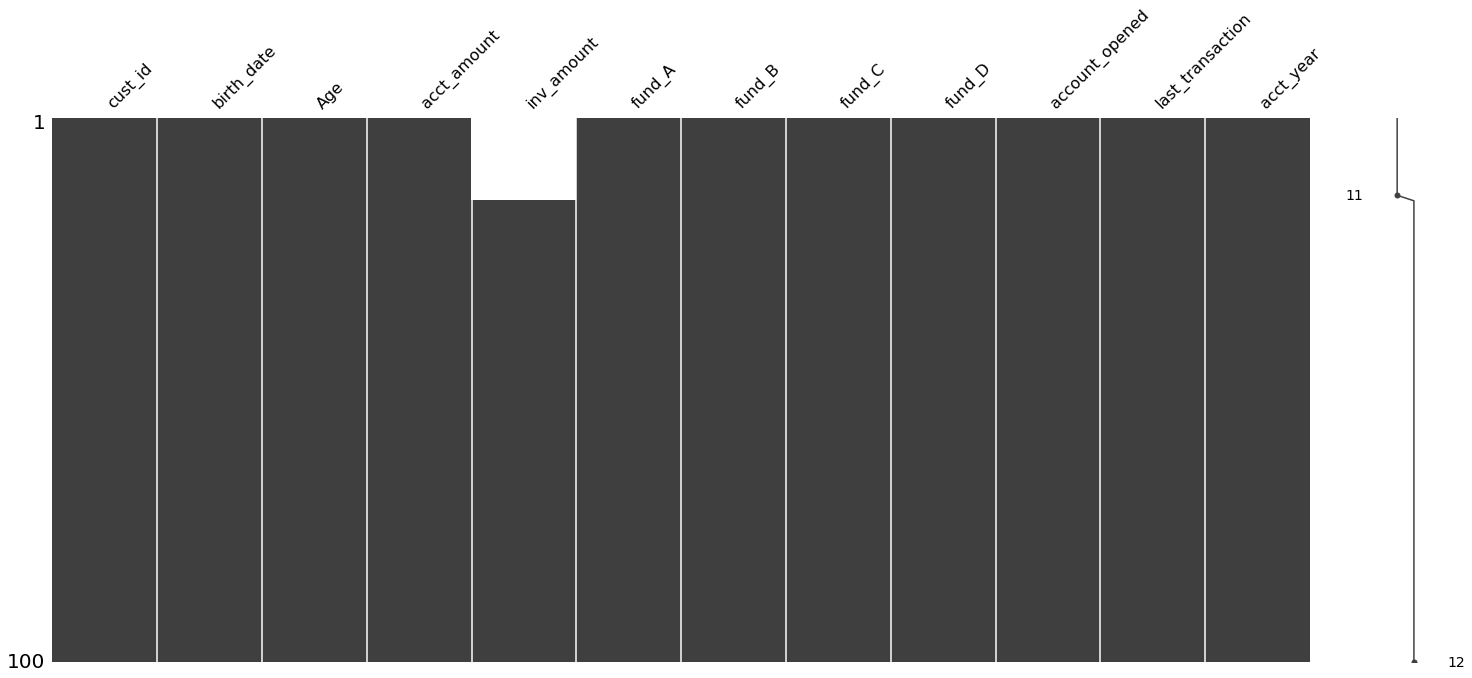

In [60]:
msno.matrix(banking)

<AxesSubplot:>

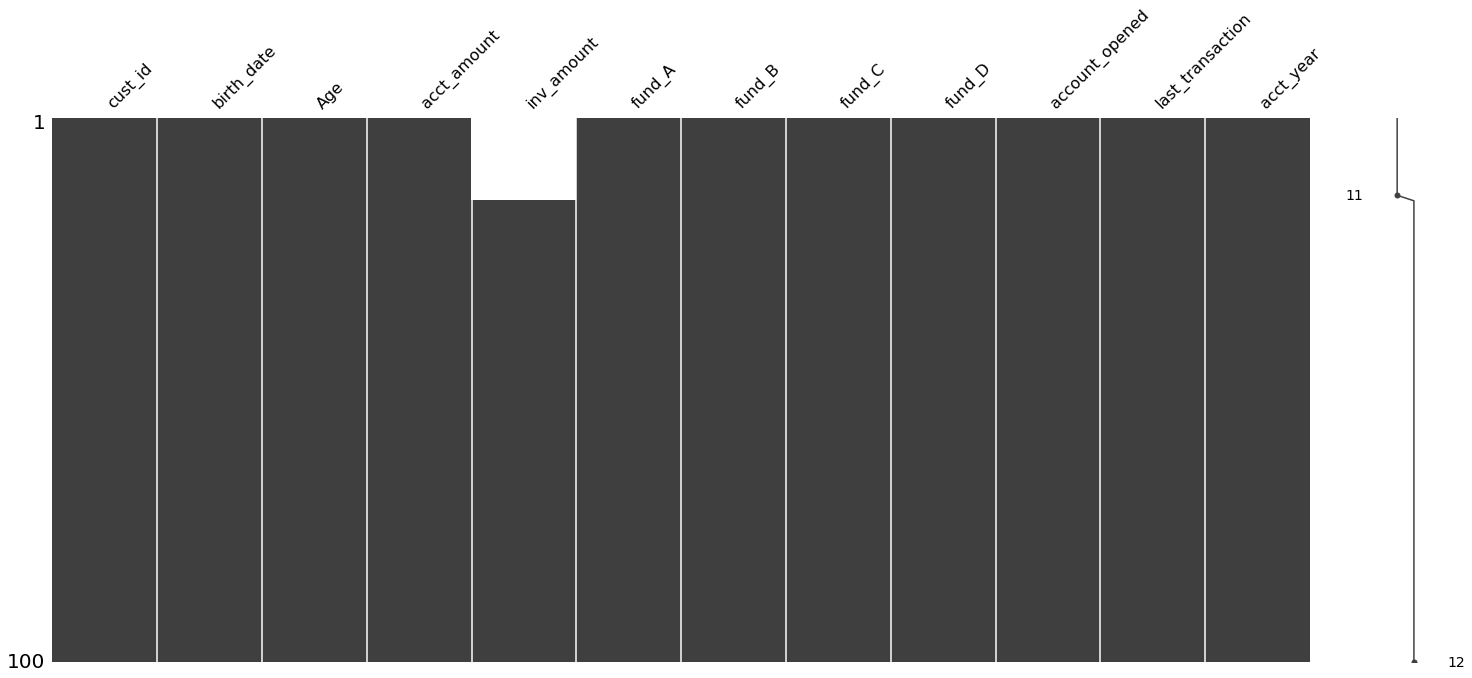

In [61]:
msno.matrix(banking.sort_values(by='Age', ascending=True))

## dropna() & fillna()

In [62]:
banking_fullid = banking.dropna(subset = ['cust_id'])
acct_imp = banking_fullid['inv_amount'] * 5

In [63]:
banking_imputed = banking_fullid.fillna({'acct_amount': acct_imp})
banking_imputed.head(5)

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
19,DEB87C87,2018-03-20,27,64944.62,NaN,11828.0,13372.0,1039.0,5562.0,2018-03-20,15-11-19,2018
35,078C654F,2017-04-14,27,87312.64,NaN,3684.0,17635.0,11717.0,33493.0,2017-04-14,5/8/18,2017
99,AC91D689,2017-01-08,27,99490.61,NaN,2184.0,17918.0,6714.0,5333.0,2017-01-08,4/8/19,2017
22,96525DA6,2018-07-23,28,82511.24,NaN,8206.0,15019.0,5559.6,6182.0,2018-07-23,7/8/18,2018
24,EC10469C,2018-12-27,28,73618.75,NaN,2808.0,22831.0,958.0,22380.0,2018-12-27,8/6/18,2018


# 4. Record Linkage

## Similarity

In [64]:
from fuzzywuzzy import process

In [65]:
restaurants = pd.read_csv('restaurants_L2.csv', index_col = 0)
restaurants.head(5)

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [66]:
restaurants_new = pd.read_csv('restaurants_L2_dirty.csv', index_col=0)
restaurants_new.head(5)

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [67]:
unique_types = restaurants.type.unique()
unique_types

array(['american', 'asian', 'italian', 'coffeebar', 'mexican',
       'southwestern', 'steakhouses', 'southern', 'cajun'], dtype=object)

- Calculate similarity of 'asian' to all values in `unique_types`

In [68]:
process.extract('asian', unique_types, limit = len(unique_types))

[('asian', 100),
 ('italian', 67),
 ('american', 62),
 ('mexican', 50),
 ('cajun', 40),
 ('southwestern', 36),
 ('southern', 31),
 ('steakhouses', 25),
 ('coffeebar', 18)]

In [69]:
matches = process.extract('italian', restaurants.type, limit=restaurants.type.shape[0])
matches[0:5]

[('italian', 100, 6),
 ('italian', 100, 10),
 ('italian', 100, 11),
 ('italian', 100, 16),
 ('italian', 100, 19)]

- Reassign similar `type`

In [70]:
for match in matches:
    if(match[1] >= 80):
        restaurants.loc[restaurants.type == match[0], 'type'] = 'italian'

In [71]:
categories = ['italian', 'asian', 'american']

In [72]:
for cat in categories:
    matches = process.extract(cat, restaurants['type'], limit = len(restaurants.type))
    for match in matches:
        if match[1] >= 70:
            restaurants.loc[restaurants['type'] == match[0], 'type'] = cat

In [73]:
restaurants.type.unique()

array(['american', 'asian', 'italian', 'coffeebar', 'southwestern',
       'steakhouses', 'southern', 'cajun'], dtype=object)

## RecordLinkage

In [74]:
# instantiate an indexing object
import recordlinkage
indexer = recordlinkage.Index()

In [75]:
# block pairing on 'type' column
indexer.block('type')

<Index>

In [76]:
# generate pairs
pairs = indexer.index(restaurants, restaurants_new)
pairs

MultiIndex([(  0,  0),
            (  0,  1),
            (  0,  7),
            (  0, 12),
            (  0, 13),
            (  0, 20),
            (  0, 27),
            (  0, 28),
            (  0, 39),
            (  0, 40),
            ...
            (221, 55),
            (230, 55),
            (233, 55),
            (238, 55),
            (241, 55),
            ( 40, 18),
            (281, 18),
            (288, 18),
            (302, 18),
            (308, 18)],
           length=3784)

In [77]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

In [78]:
# set exactly same columns
comp_cl.exact('city', 'city', label = 'city')
comp_cl.exact('type', 'type', label = 'type')
# set similar columns
comp_cl.string('name', 'name', label = 'name', threshold = 0.8)

<Compare>

In [79]:
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
potential_matches

city  type  name
0   0      0     1   0.0
    1      0     1   0.0
    7      0     1   0.0
    12     0     1   0.0
    13     0     1   0.0
...      ...   ...   ...
40  18     0     1   0.0
281 18     0     1   0.0
288 18     0     1   0.0
302 18     0     1   0.0
308 18     0     1   0.0

[3784 rows x 3 columns]

In [80]:
matches = potential_matches[potential_matches.sum(axis=1) >= 3]
matches.head(5)

,,city,type,name
0,40,1,1,1.0
1,28,1,1,1.0
2,74,1,1,1.0
3,1,1,1,1.0
4,53,1,1,1.0


In [81]:
matching_indices = matches.index.get_level_values(1)
matching_indices

Int64Index([40, 28, 74,  1, 53, 43, 50,  7, 67, 12, 20, 27, 65, 79, 26, 71, 73,
            75, 21, 57, 47, 55],
           dtype='int64')

In [82]:
# subset restaurants that are in restaurants_new but not in restaurants
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

In [83]:
full_restaurants = restaurants.append(non_dup)

In [84]:
full_restaurants.shape

(396, 5)